# Diagnóstico de cáncer de mama
## Aprendizaje No Supervisado

Ahora toca el turno de repasar aprendizaje no supervisado, ¿recuerdas de qué trata? A diferencia del aprendizaje supervisado donde siempre conocemos los valores de salida para poder evaluar la predicción de nuestros modelos, en apredizaje no supervisado no conocemos los valores de salida y por lo tanto no podemos evaluar la predicción de nuestros modelos.

Entonces, en aprendizaje no supervisado nos interesan dos tareas principales:
            1) Encontrar la agrupación natural de los datos
            2) Encontrar la asociación natural de las variables
          
En esta práctiva vamos a repasar nuevamente KMean como técnica de clusterización y realizaremos análisis de componentes principales como técnica de reducción de dimensiones. ¡Prepárate!

### Librarías útiles

Como es usual, vamos a importar todas las librerías de utilidad para esta aplicación. Adicional a nuestras librerías básicas, importaremos funciones específicas de sklearn

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Base de datos

In [54]:
df = pd.read_csv("breast-cancer.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [55]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Un punto importante en machine learning es asignar en una matriz de datos únicamente las variables de interés, ya que con estos datos vamos a entrenar el modelo

In [56]:
# Tomemos únicamente las variables explicativas de interés
X = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

# X = df['costumer'].drop()
print(X.describe().T)

                         count        mean         std        min        25%  \
radius_worst             569.0   16.269190    4.833242    7.93000   13.01000   
texture_worst            569.0   25.677223    6.146258   12.02000   21.08000   
perimeter_worst          569.0  107.261213   33.602542   50.41000   84.11000   
area_worst               569.0  880.583128  569.356993  185.20000  515.30000   
smoothness_worst         569.0    0.132369    0.022832    0.07117    0.11660   
compactness_worst        569.0    0.254265    0.157336    0.02729    0.14720   
concavity_worst          569.0    0.272188    0.208624    0.00000    0.11450   
concave_points_worst     569.0    0.114606    0.065732    0.00000    0.06493   
symmetry_worst           569.0    0.290076    0.061867    0.15650    0.25040   
fractal_dimension_worst  569.0    0.083946    0.018061    0.05504    0.07146   

                               50%         75%        max  
radius_worst              14.97000    18.79000    36.0400  

Todas las variables representan indicadores de relacionadas con los patrones de consumo de una serie de clientes. Aunque la escala es muy similar entre variables, siempre es útil estandarizar las variables para métodos no supervisados

In [58]:
# Estandarizar variables
ss = StandardScaler()
X_ss = ss.fit_transform(X)

x_df = pd.DataFrame(X_ss, columns = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
print(x_df.describe().T)

                         count          mean      std       min       25%  \
radius_worst             569.0 -7.956924e-16  1.00088 -1.726901 -0.674921   
texture_worst            569.0 -1.834112e-17  1.00088 -2.223994 -0.748629   
perimeter_worst          569.0 -4.015534e-16  1.00088 -1.693361 -0.689578   
area_worst               569.0 -2.848727e-17  1.00088 -1.222423 -0.642136   
smoothness_worst         569.0 -2.251665e-16  1.00088 -2.682695 -0.691230   
compactness_worst        569.0 -2.579464e-16  1.00088 -1.443878 -0.681083   
concavity_worst          569.0  1.143393e-16  1.00088 -1.305831 -0.756514   
concave_points_worst     569.0  3.203842e-16  1.00088 -1.745063 -0.756400   
symmetry_worst           569.0  1.783381e-16  1.00088 -2.160960 -0.641864   
fractal_dimension_worst  569.0 -6.436952e-16  1.00088 -1.601839 -0.691912   

                              50%       75%       max  
radius_worst            -0.269040  0.522016  4.094189  
texture_worst           -0.043516  0.658

### Análisis de Componentes Principales

In [59]:
# Crear la instancia PCA y ajustar los datos
pca = PCA()
pca.fit(X_ss)

PCA()

El PCA va a generar tantos componentes principales como variables en nuesro dataframe. La idea es reconstruir todo el espacio por medio de componentes y después retener el númer de componentes deseados con base en la varianza que deseamos explicar

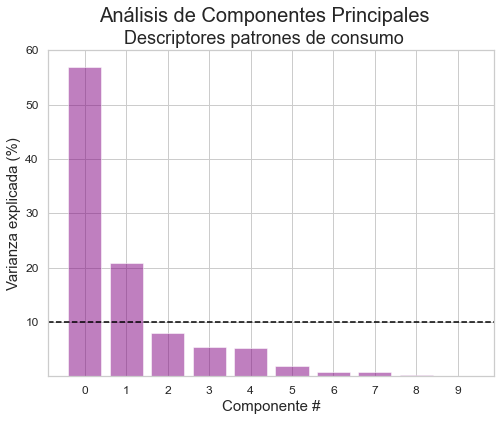

In [60]:
# Gráfica de varianza explicada
features = range(pca.n_components_)

fig = plt.figure(figsize = (8,6))
plt.bar(features, pca.explained_variance_ratio_ * 100, color = 'purple', alpha = 0.5)
plt.suptitle('Análisis de Componentes Principales' , fontsize = 20)
plt.title('Descriptores patrones de consumo   ', fontsize = 18)
plt.xlabel('Componente #', loc = 'center', fontsize = 15)
plt.ylabel('Varianza explicada (%)', fontsize = 15)
plt.xticks(features , fontsize = 12)
plt.yticks([i * 10 for i in range(1, 7)], fontsize = 12)
plt.axhline(y = 10, linestyle = '--', color = 'black')
plt.show()

Si deseamos explicar aproximadamente el 90% de la varianza original, deberiamos retener los primeros dos componentes principales, los cuales explican aproximadamente el 60% y 30% respectivamente.

Con base en este análisis, retenemos los dos componentes principales

In [61]:
# Generemos la instancia indicando el número de componentes a retener
pca = PCA(n_components = 2)

# Ajustamos y transformamos los datos
pca_features = pca.fit_transform(X_ss)
print(pca_features)
print(pca_features.shape)

[[ 5.97453607  0.67208533]
 [ 1.81838255 -2.31502795]
 [ 3.4077323  -0.78028166]
 ...
 [ 0.66199929 -1.33064482]
 [ 7.37822625  1.02787544]
 [-3.45728176  0.10714402]]
(569, 2)


In [62]:
# Podemos guardar los valores de los componentes en nuestro DataFrame
df[['pca1', 'pca2']] = pca_features
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  perimeter_worst  area_worst  smoothness_worst  compact

In [63]:
pca_components = pca.components_
print(pca_components.T)
print(pca_components.shape)

[[ 0.33591012 -0.40313668]
 [ 0.20073143 -0.04257198]
 [ 0.348151   -0.37551796]
 [ 0.32473916 -0.41525563]
 [ 0.24862582  0.33786981]
 [ 0.36456821  0.25056608]
 [ 0.37474243  0.13908482]
 [ 0.39763727 -0.04168507]
 [ 0.24975281  0.30860719]
 [ 0.25408289  0.47849501]]
(2, 10)


Ahora, vamos a realizar un diagrama de dispersión en 2D para observar la dispersión de los clientes con base en los componentes principales

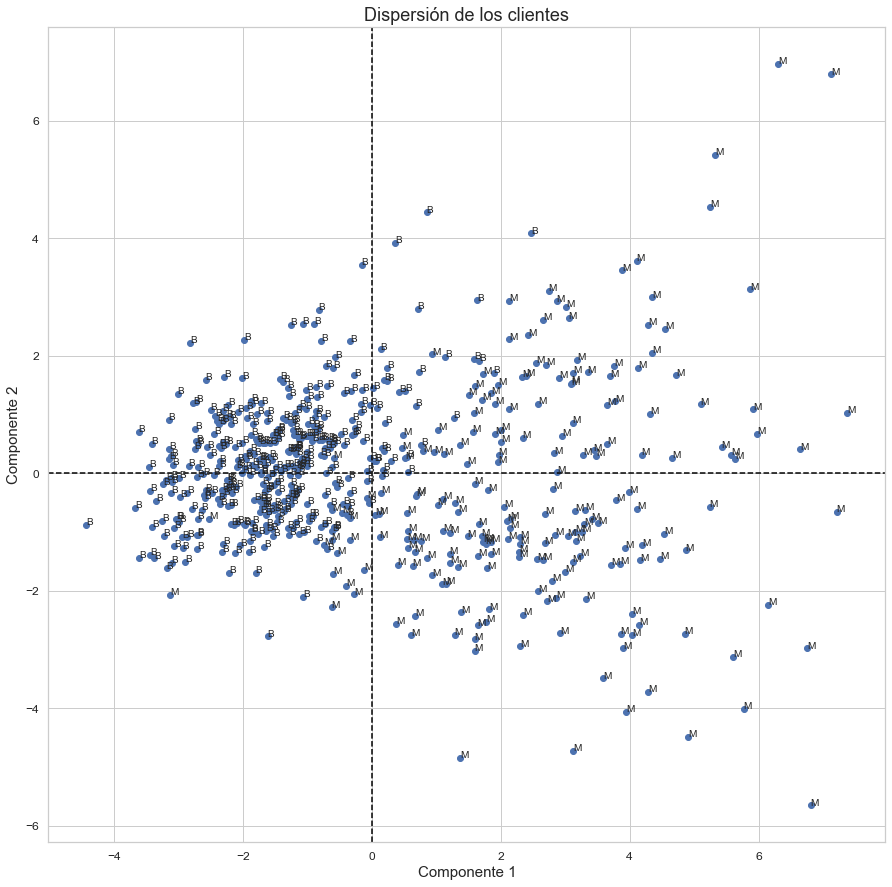

In [64]:
# Asignamos los componentes a dos variables
xs = pca_features[:,0]
ys = pca_features[:,1]

#Extraemos las etiquetas de las clientes
cost = df['diagnosis']
cost = np.asarray(cost)

# Generemos el diagrama de dispersión
plt.figure(figsize=(15, 15))
plt.scatter(xs, ys)

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de los clientes', fontsize = 18)
plt.xlabel('Componente 1', loc = 'center', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axvline(x = 0, linestyle = '--', color = 'black')
plt.show()

¿Podemos observar alguna agrupación natural en los clientes?

## Clústeres por KMedias

Utilizaremos la técnica de KMedias para formar clústeres, pero antes de eso, realizaremos un análisis exploratorio para definir el número adecuado de clústeres usando la inercia ... es decir, un indicador de la distancia entre puntos.

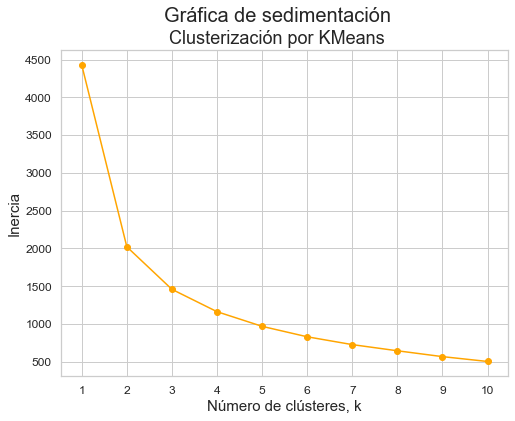

In [65]:
## Probar con distintos números de clústeres y comparar su inercia
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(pca_features)
    inertias.append(model.inertia_)
    
# Gráfico de sedimentación para ver las incercias
fig = plt.figure(figsize = (8, 6))
plt.plot(ks, inertias, '-o', color = 'orange')
plt.suptitle('Gráfica de sedimentación' , fontsize = 20)
plt.title('Clusterización por KMeans   ', fontsize = 18)
plt.xlabel('Número de clústeres, k', fontsize = 15)
plt.ylabel('Inercia', fontsize = 15)
plt.xticks(ks, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Parece que después de 4 o 5 clústeres la inercia ya no se reduce tan rápido ... vamos a probar con 5 clústeres

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 

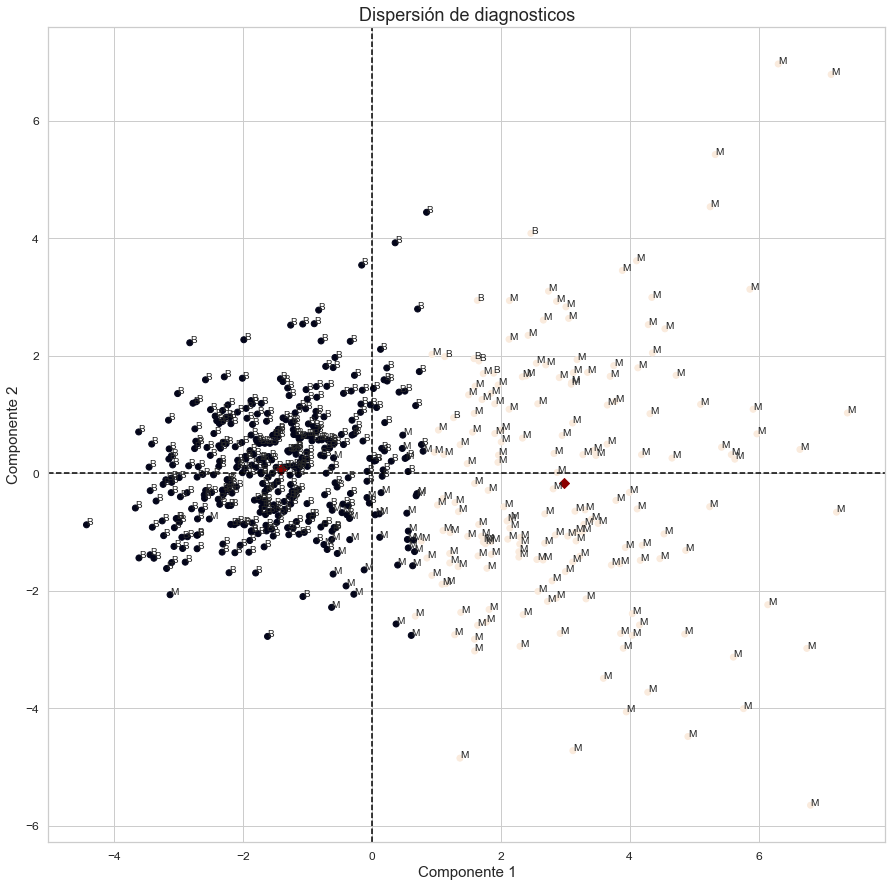

In [72]:
# Generamos nuestra instancia con 5 clústeres
model = KMeans(n_clusters = 2)

# Ajustamos el modelo a nuestros datos y predecimos los centroides
labels = model.fit_predict(pca_features)
print(labels)

# Obtenemos los centroides y separamos sus coordenadas
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Observemos nuevamente nuestro gráfico de dispersión con la clusterización de los clientes
plt.figure(figsize = (15, 15))

plt.scatter(xs, ys, c = labels)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, color = 'darkred')

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de diagnosticos', fontsize = 18)
plt.xlabel('Componente 1', loc = 'center', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axhline(y = ys.mean(), linestyle = '--', color = 'black')
plt.axvline(x = xs.mean(), linestyle = '--', color = 'black')
plt.show()

In [73]:
# get centroids
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cluster'] = labels
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})

print(df[['cen_x', 'cen_y', 'cluster']].head())

      cen_x     cen_y  cluster
0  2.982101 -0.165814        1
1  2.982101 -0.165814        1
2  2.982101 -0.165814        1
3  2.982101 -0.165814        1
4  2.982101 -0.165814        1


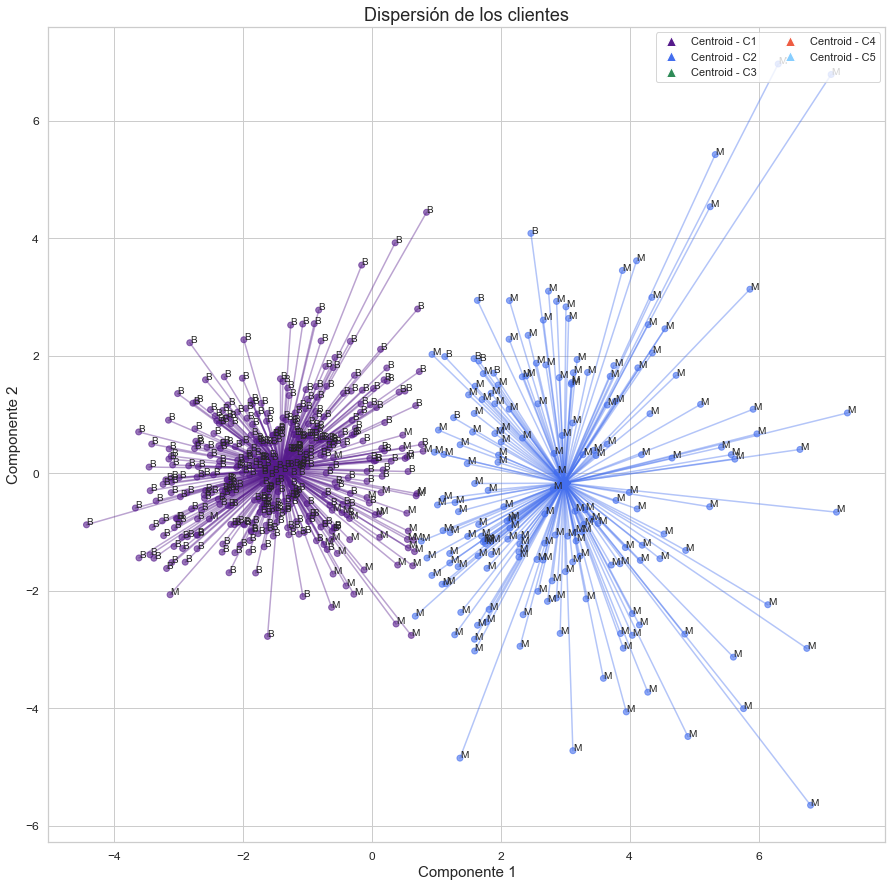

In [74]:
from matplotlib.lines import Line2D

colors = ['#551A8B', '#436EEE', '#2E8B57', '#EE5C42', '#87CEFF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.figure(figsize = (15, 15))

plt.scatter(df['pca1'], df['pca2'], c = df['c'], alpha = 0.6)
plt.scatter(df['cen_x'], df['cen_y'], marker="D", s=70, color = df['c'])

for idx, val in df.iterrows():
    x = [val['pca1'], val['cen_x']]
    y = [val['pca2'], val['cen_y']]
    plt.plot(x, y, color = val['c'], alpha = 0.4)

cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
plt.legend(handles=cent_leg, loc='upper right', ncol=2)

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de los clientes', fontsize = 18)
plt.xlabel('Componente 1', loc = 'center', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

DBSCAN


Una vez que tenemos esta información en nuestro DataFrame, podemos aplicar lás tenicas descriptivas que hemos visto en sesiones anteriores para entender cada uno de nuestros segmentos de clientes

In [51]:
print(df[df['cluster'] == 0]['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
562    M
563    M
564    M
565    M
567    M
Name: diagnosis, Length: 172, dtype: object


In [52]:
df.groupby('cluster')[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
        'concavity_mean','concave points_mean','symmetry_mean']].agg([np.mean, np.std])

radius_mean           texture_mean           perimeter_mean  \
               mean       std         mean       std           mean   
cluster                                                               
0         18.112913  3.152602    21.484593  4.027454     120.139302   
1         12.400524  1.905865    18.338690  4.065754      79.764282   

                      area_mean             smoothness_mean            \
               std         mean         std            mean       std   
cluster                                                                 
0        21.191876  1048.597093  369.362027        0.104900  0.012504   
1        12.607749   484.315365  149.088101        0.092661  0.013069   

        compactness_mean           concavity_mean            \
                    mean       std           mean       std   
cluster                                                       
0               0.159129  0.050928       0.182986  0.071110   
1               0.080604  0.031812       0.047993  0.037545   

        concave points_mean           symmetry_mean            
                       mean       std          mean       std  
cluster                                                        
0                  0.097945  0.030033      0.197469  0.028219  
1                  0.027679  0.016550      0.174097  0.023845

https://www.linkedin.com/in/dillanas22/
https://github.com/DillanAS


1.- Regularización
2.- Métodos de ensamble (ensemble)
3.- Hiperparámetros